## IMPORTING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier

## IMPORTING THE DATA

In [2]:
adults = pd.read_csv('adults.csv') #storing the data in variable, changing ? to NaN

In [3]:
adults.shape                                    #displaying number of columns and rows

(48842, 15)

In [4]:
adults.head(10)                                 #displaying first ten rows

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## DATA CLEANING

In [5]:
adults.dtypes 

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
for i in adults:
    for j in adults[i]:
        if j == '?':
            adults[i] = adults[i].replace('?',np.NaN)
            break
print("Shape of data: ",adults.shape)
print("NaN values in data:\n",adults.isnull().sum())

Shape of data:  (48842, 15)
NaN values in data:
 age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [7]:
adults.dropna(subset=['workclass'], how='any',inplace=True) #droping samples that contain NaN value
adults.dropna(subset=['occupation'], how='any',inplace=True)
adults.dropna(subset=['native-country'], how='any',inplace=True)
adults.shape

(45222, 15)

In [8]:
adults.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [9]:
adults['education'].value_counts()

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64

In [10]:
adults['education'] = adults['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th',                                                '10th','11th','12th'], 'school')
adults['education'] = adults['education'].replace('HS-grad','high school')
adults['education'] = adults['education'].replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'higher')
adults['education'].value_counts()

high school    14783
higher         14150
Bachelors       7570
school          5661
Masters         2514
Doctorate        544
Name: education, dtype: int64

In [11]:
adults['marital-status'] = adults['marital-status'].replace(['Married-civ-spouse','Married-AF-spous'],'married')
adults['marital-status'] = adults['marital-status'].replace(['Never-married'],'not-married')
adults['marital-status'] = adults['marital-status'].replace(['Divorced','Separated','Widowed',
                                                             'Married-spouse-absent'],'other')
adults['marital-status'].value_counts()

married              21055
not-married          14598
other                 9537
Married-AF-spouse       32
Name: marital-status, dtype: int64

In [12]:
income = pd.get_dummies(adults['income'], drop_first = True)
gender = pd.get_dummies(adults['gender'], drop_first = True)
adults.drop(['gender','income'], axis = 1, inplace = True)
adults = pd.concat([adults,income,gender], axis = 1)

In [13]:
adults.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,>50K,Male
0,25,Private,226802,school,7,not-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,0,1
1,38,Private,89814,high school,9,married,Farming-fishing,Husband,White,0,0,50,United-States,0,1
2,28,Local-gov,336951,higher,12,married,Protective-serv,Husband,White,0,0,40,United-States,1,1
3,44,Private,160323,higher,10,married,Machine-op-inspct,Husband,Black,7688,0,40,United-States,1,1
5,34,Private,198693,school,6,not-married,Other-service,Not-in-family,White,0,0,30,United-States,0,1


## VIEWING HOW CORRELATED VALUES ARE WITH THE TARGET VALUE

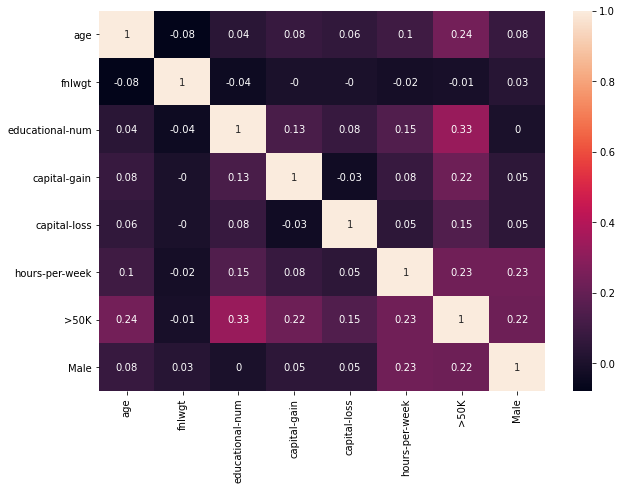

In [14]:
plt.figure(figsize=(10,7))                  #checking correlations on heatmap, rounded to 2 decimal
correlation_matrix=adults.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

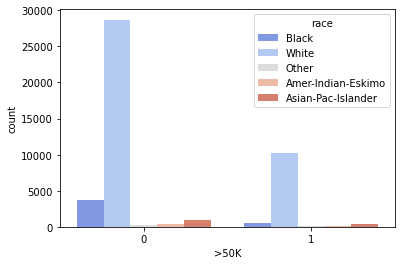

In [16]:
sns.countplot(adults['>50K'], palette = 'coolwarm', hue='race', data = adults)

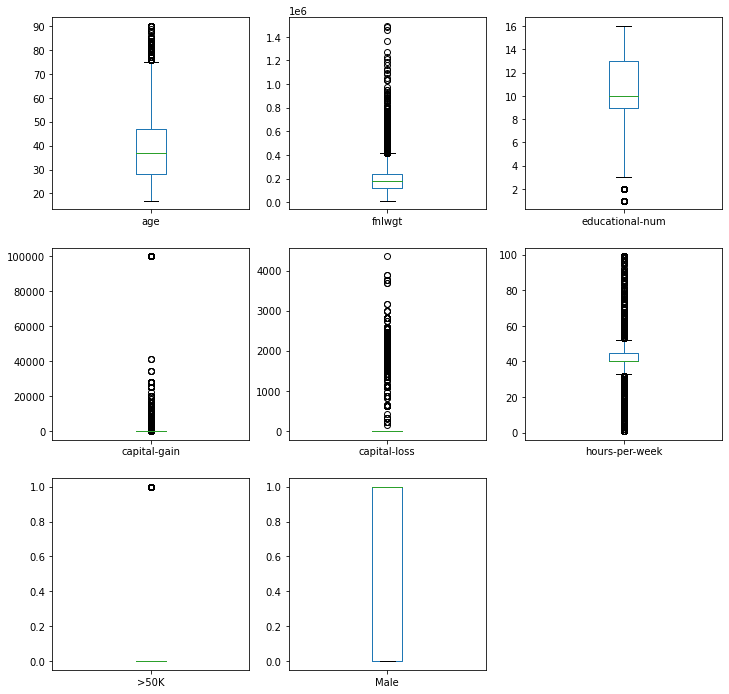